In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

In [8]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 10000000
offset = 0
location = 'Siedlerstr_Abgang' + '%'
list_data = []
while True:
    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT 250000" % (location))
    print(q)
    list_data.append(query(q))
    offset += chunk_size
    if len(list_data[-1]) < chunk_size:
        break
print("Query executed")

print("Concatenating....")
dfs = pd.concat(list_data)

now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-20 10:50:05.213454
SELECT * FROM energy_sample_data1 where location like 'Siedlerstr_Abgang%' ORDER BY Serial_no LIMIT 250000
Query executed
Concatenating....
End date and time using str method of datetime object:
2016-12-20 10:50:33.411442
Execution Completed


In [9]:
dfs = pd.DataFrame(dfs)

In [10]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

(250000, 16)

In [11]:
dfs.iloc[0][:]

Serial_no                                  1
Date                              2016-03-07
Time                         0 days 10:47:32
V1                                      0.11
V2                                      0.11
V3                                      0.11
I1                                      0.19
I2                                      0.18
I3                                      0.19
I_N                                     0.18
Pges                                   -0.15
Sges                                       0
CosPhi                                  2.45
Egy_trpt                                   5
Egy_con                                    6
Location     Siedlerstr_Abgang1_07032016.csv
Name: 0, dtype: object

In [12]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [13]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [14]:
df_cols = cols_sql.iloc[:,0]
columns_names= df_cols.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [15]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.036194,0.027697,0.093867,-0.182168,-0.026911,-0.031955,-0.041264,0.239653,-0.087879,-0.063377,0.991344,0.991860
V1,0.036194,1.000000,0.988468,0.986358,-0.235632,-0.330996,-0.331561,0.102155,0.021735,-0.304625,-0.234744,0.054474,0.056778
V2,0.027697,0.988468,1.000000,0.984772,-0.255850,-0.361430,-0.361854,0.097180,0.006741,-0.333016,-0.238118,0.042142,0.045179
V3,0.093867,0.986358,0.984772,1.000000,-0.258623,-0.326917,-0.327774,0.055375,0.078335,-0.310405,-0.222813,0.109819,0.112770
I1,-0.182168,-0.235632,-0.255850,-0.258623,1.000000,0.752722,0.753086,0.088771,-0.318187,0.891895,0.248754,-0.148454,-0.156601
I2,-0.026911,-0.330996,-0.361430,-0.326917,0.752722,1.000000,0.999416,-0.097725,0.129895,0.968166,0.442042,-0.007142,-0.011953
I3,-0.031955,-0.331561,-0.361854,-0.327774,0.753086,0.999416,1.000000,-0.097565,0.128591,0.968743,0.441908,-0.012334,-0.017145
I_N,-0.041264,0.102155,0.097180,0.055375,0.088771,-0.097725,-0.097565,1.000000,-0.384276,-0.034166,-0.285323,-0.015576,-0.018703
Pges,0.239653,0.021735,0.006741,0.078335,-0.318187,0.129895,0.128591,-0.384276,1.000000,-0.029154,0.068271,0.219032,0.223289
Sges,-0.087879,-0.304625,-0.333016,-0.310405,0.891895,0.968166,0.968743,-0.034166,-0.029154,1.000000,0.396819,-0.061358,-0.067711


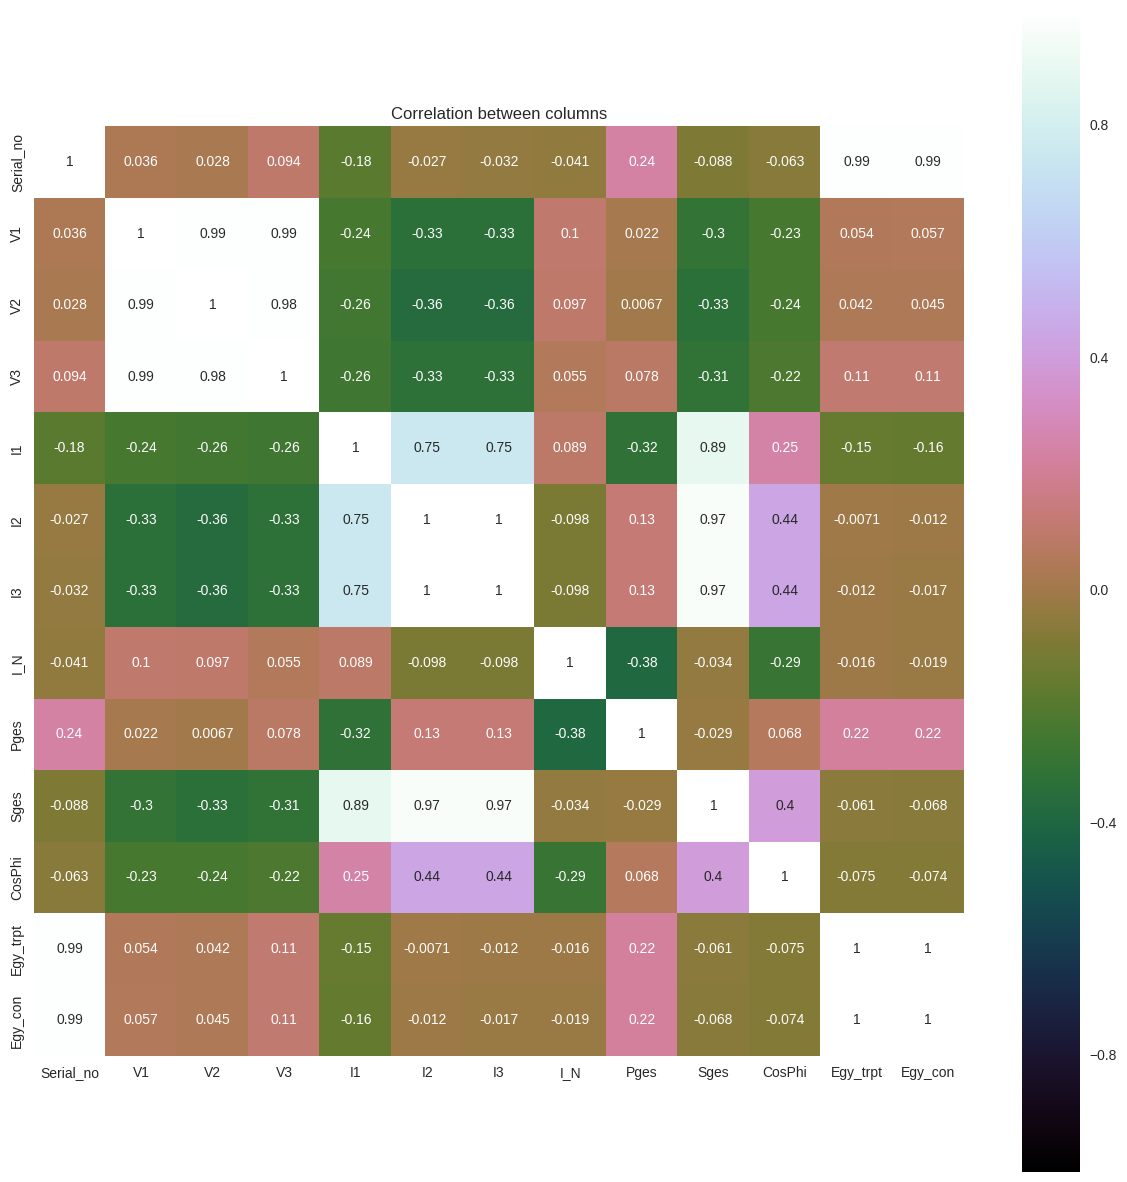

In [16]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation between  before dimensionality reduction of Siedlerstr_Trafo.png')

# PCA implementation

In [17]:
dfs.axes

[Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             249990, 249991, 249992, 249993, 249994, 249995, 249996, 249997,
             249998, 249999],
            dtype='int64', length=250000),
 Index([u'Serial_no', u'Date', u'Time', u'V1', u'V2', u'V3', u'I1', u'I2',
        u'I3', u'I_N', u'Pges', u'Sges', u'CosPhi', u'Egy_trpt', u'Egy_con',
        u'Location'],
       dtype='object')]

In [18]:
dfs.columns

Index([u'Serial_no', u'Date', u'Time', u'V1', u'V2', u'V3', u'I1', u'I2',
       u'I3', u'I_N', u'Pges', u'Sges', u'CosPhi', u'Egy_trpt', u'Egy_con',
       u'Location'],
      dtype='object')

In [19]:
dfs_drop = dfs.drop(labels =['Date','Time','Serial_no'],axis=1)

In [20]:
dfs_drop.head()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,0.11,0.11,0.11,0.19,0.18,0.19,0.18,-0.15,0.00,2.45,5,6,Siedlerstr_Abgang1_07032016.csv
1,0.11,0.11,0.11,0.19,0.18,0.19,0.18,-0.15,0.00,2.45,5,6,Siedlerstr_Abgang1_07032016.csv
2,0.11,0.11,0.11,0.19,0.18,0.19,0.18,-0.15,0.00,2.45,5,6,Siedlerstr_Abgang1_07032016.csv
3,229.36,229.20,229.15,40.81,38.76,40.01,23.01,-1752.14,27390.95,0.70,78,65,Siedlerstr_Abgang1_07032016.csv
4,229.36,229.20,229.15,40.81,38.76,40.01,23.01,-1752.14,27390.95,0.70,78,65,Siedlerstr_Abgang1_07032016.csv


# Plot statistics by grouping location 

In [21]:
df_loc = dfs_drop.groupby('Location') # groupby location wise

In [22]:
df_loc.describe()

CosPhi        Egy_con  \
Location                                                             
Siedlerstr_Abgang1_07032016.csv count  47548.000000   47548.000000   
                                mean       0.671006   57874.705470   
                                std        0.075056   37604.962297   
                                min        0.240000       6.000000   
                                25%        0.640000   26744.000000   
                                50%        0.680000   47350.010000   
                                75%        0.710000   91993.260000   
                                max        2.450000  126260.010000   
Siedlerstr_Abgang1_08032016.csv count  86400.000000   86400.000000   
                                mean       0.672024  222525.674210   
                                std        0.090170   57495.951880   
                                min        0.090000  126260.010000   
                                25%        0.650000  171616.020000   
                                50%        0.690000  224253.020000   
                                75%        0.720000  256840.020000   
                                max        0.870000  332505.020000   
Siedlerstr_Abgang1_09032016.csv count  86400.000000   86400.000000   
                                mean       0.637270  420374.968128   
                                std        0.121910   49142.163372   
                                min        0.030000  332505.020000   
                                25%        0.620000  380641.040000   
                                50%        0.670000  427201.040000   
                                75%        0.710000  443955.040000   
                                max        0.910000  517809.040000   
Siedlerstr_Abgang1_10032016.csv count  29652.000000   29652.000000   
                                mean       0.692363  551999.562562   
                                std        0.034039   20452.311158   
                                min        0.520000  517809.040000   
                                25%        0.670000  535306.040000   
                                50%        0.700000  550239.040000   
                                75%        0.720000  568582.040000   
                                max        0.770000  593085.040000   

                                            Egy_trpt            I1  \
Location                                                             
Siedlerstr_Abgang1_07032016.csv count   47548.000000  47548.000000   
                                mean    83003.675513     52.760177   
                                std     48936.856304     16.832415   
                                min         5.000000      0.190000   
                                25%     42460.010000     42.450000   
                                50%     74685.010000     52.710000   
                                75%    128371.760000     63.730000   
                                max    166740.010000    107.900000   
Siedlerstr_Abgang1_08032016.csv count   86400.000000  86400.000000   
                                mean   293155.754612     45.575259   
                                std     78654.906056     18.251872   
                                min    166740.010000      7.410000   
                                25%    220638.020000     32.230000   
                                50%    293206.020000     43.930000   
                                75%    347741.040000     58.590000   
                                max    440081.040000    122.900000   
Siedlerstr_Abgang1_09032016.csv count   86400.000000  86400.000000   
                                mean   553042.383844     41.069228   
                                std     67185.359421     23.003794   
                                min    440081.040000      6.300000   
                                25%    498464.040000     22.180000   
                                50%    553905.040000  

Below you will calculate the correlation on the data grouped by location

In [23]:
df_loc_siedlr_trafo_stats = df_loc.corr(method='pearson', min_periods=1)

In [24]:
df_loc_siedlr_trafo_stats.to_csv(r'Siedlr_abgang_part1_stats.csv',mode='w',header='True')

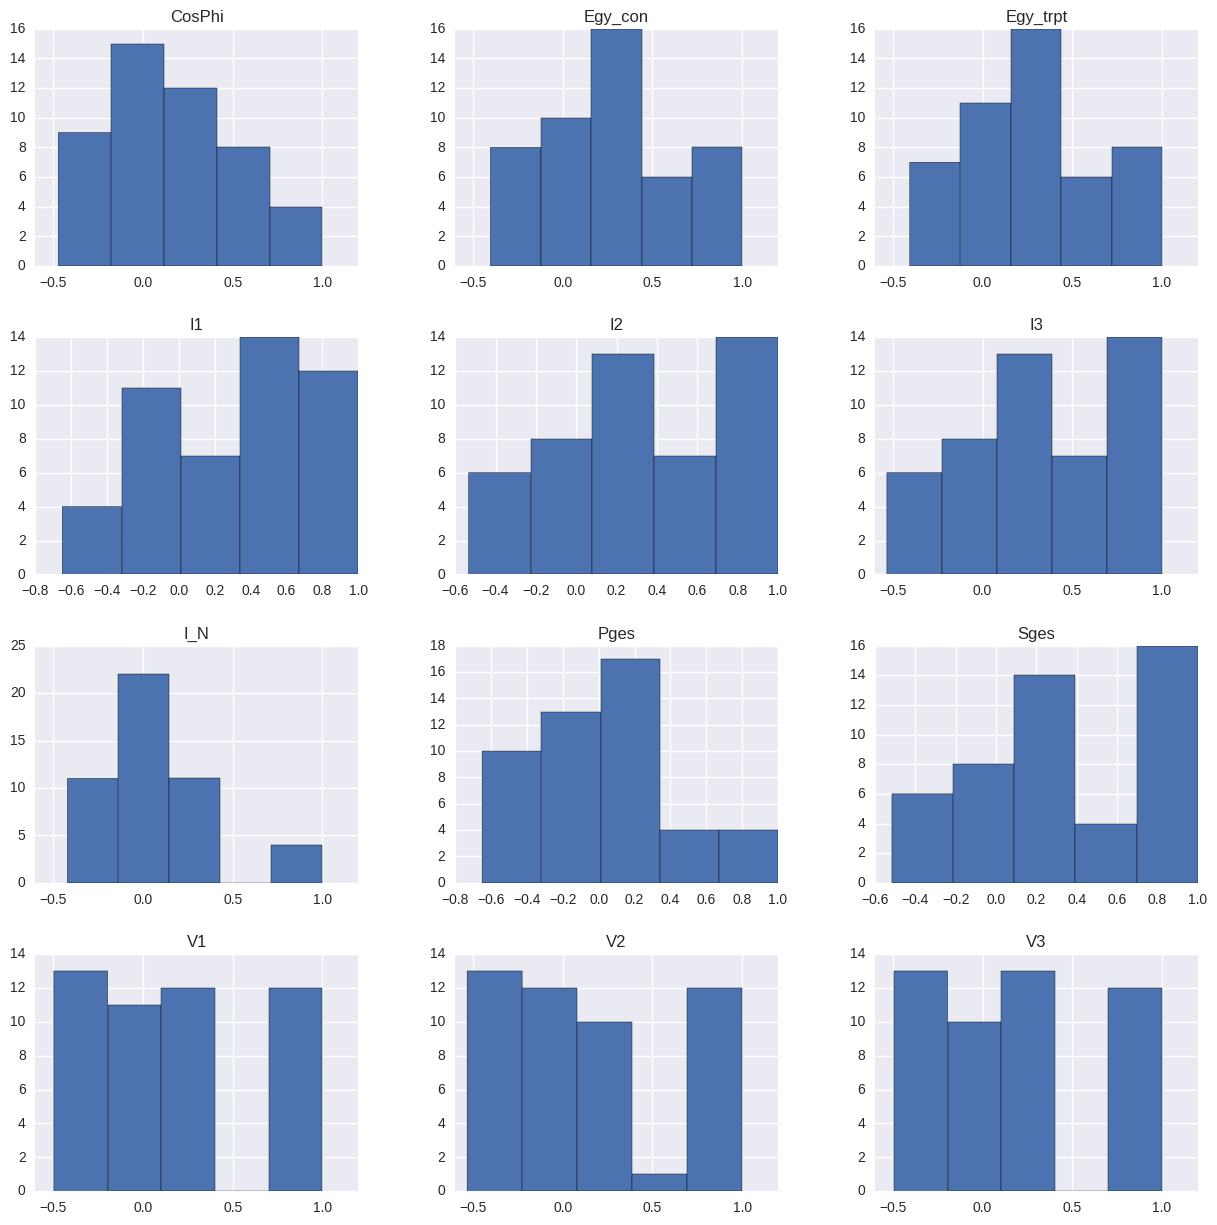

In [25]:
df_loc_siedlr_trafo_stats.hist(bins=5,figsize=(15,15))
plt.savefig('Correlation statistics of Siedlerstr_Trafo.png')
plt.show()


Compute only the mean of the data grouped by location and visualize

In [26]:
df_st_mean = df_loc.mean()
df_st_mean

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,
Siedlerstr_Abgang1_07032016.csv,231.549544,231.553479,231.371095,52.760177,42.559560,43.811996,15.646724,-3063.140875,32192.516842,0.671006,83003.675513,57874.705470
Siedlerstr_Abgang1_08032016.csv,232.225652,232.243164,232.227785,45.575259,38.810101,39.841801,15.008503,-2797.214692,28822.338173,0.672024,293155.754613,222525.674211
Siedlerstr_Abgang1_09032016.csv,232.375392,232.314827,232.459483,41.069228,36.361341,37.229337,15.733263,-2483.306306,26592.784422,0.637270,553042.383844,420374.968129
Siedlerstr_Abgang1_10032016.csv,231.563203,231.627453,231.795531,35.685408,39.763018,40.678019,12.057816,-612.931892,26910.224921,0.692363,720134.720888,551999.562562


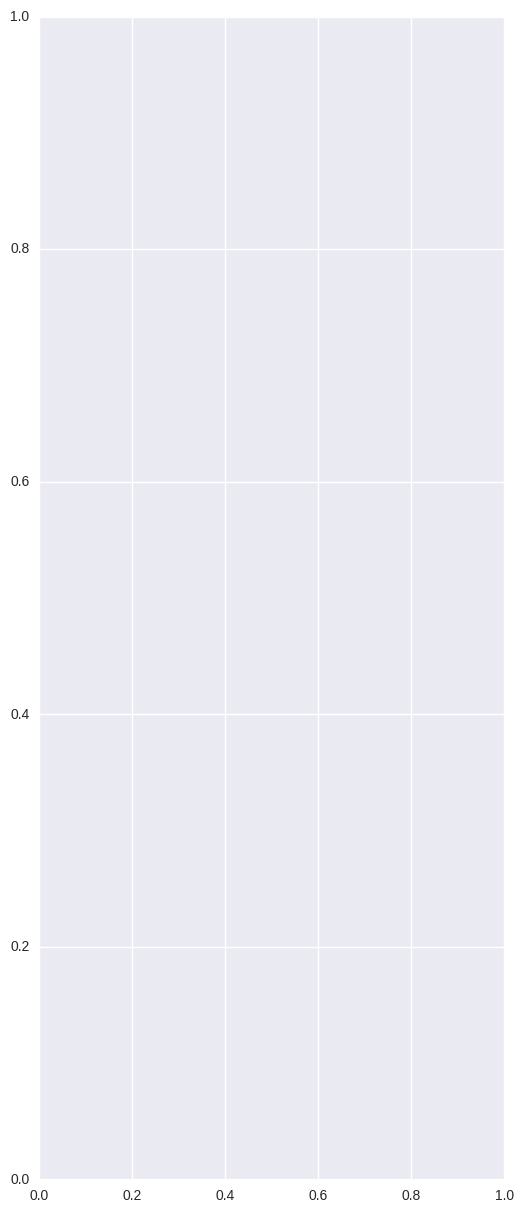

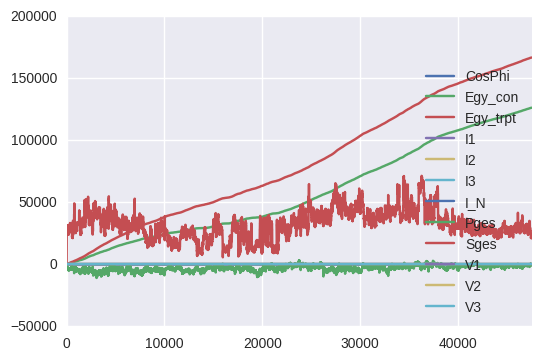

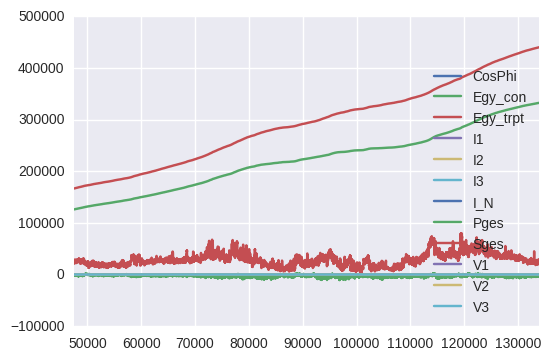

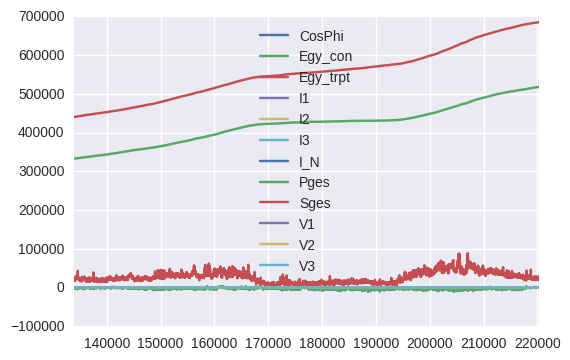

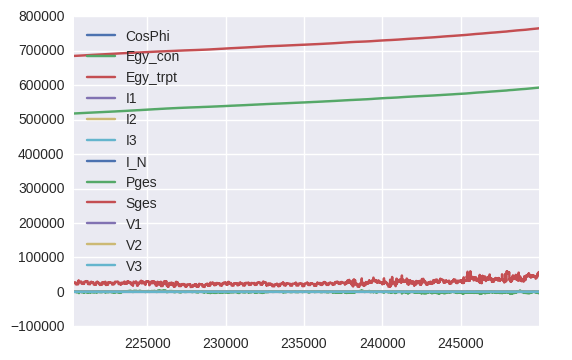

In [27]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = df_loc.plot(kind='kde', ax2 = ax2, legend=False)
